In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 as cv
import os

In [3]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
train_path = "/content/drive/MyDrive/se1/train"
test_path = "/content/drive/MyDrive/se1/test"
val_path="/content/drive/MyDrive/se1/val"

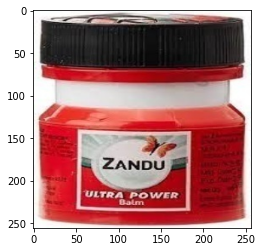

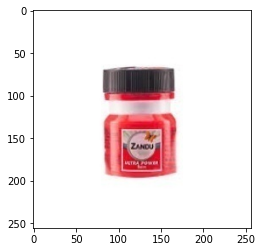

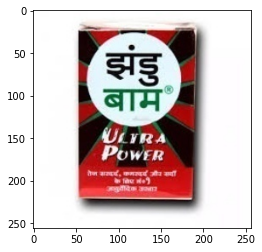

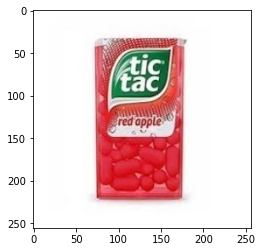

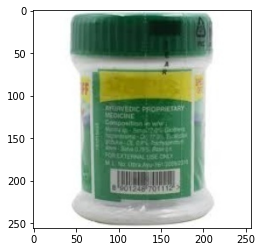

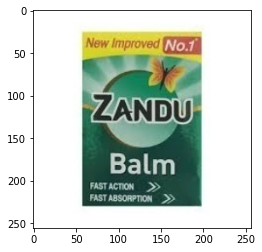

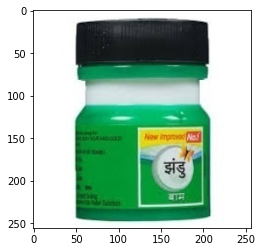

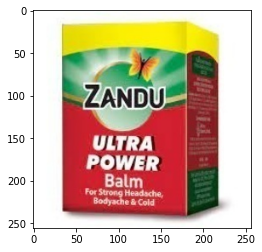

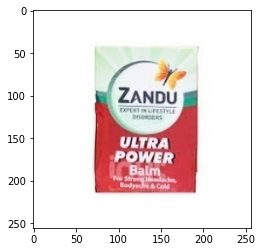

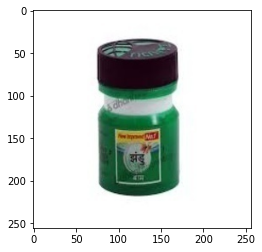

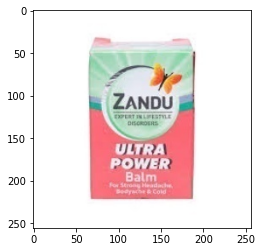

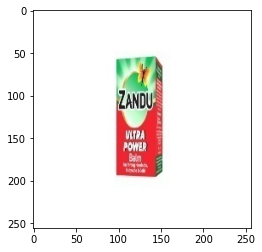

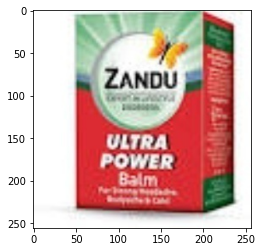

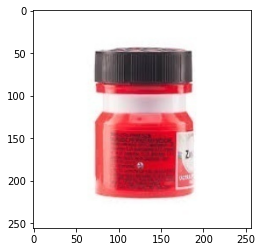

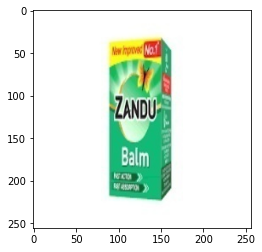

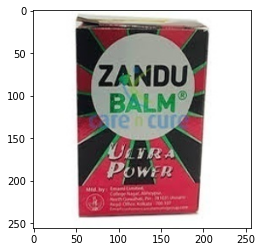

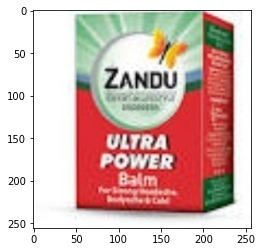

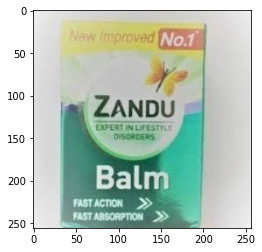

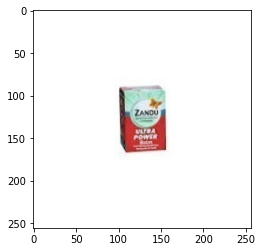

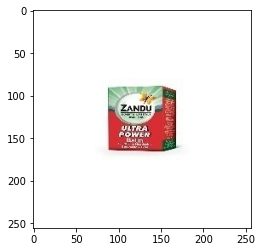

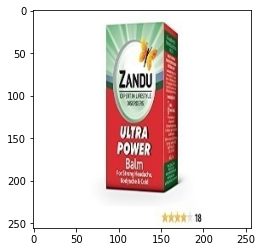

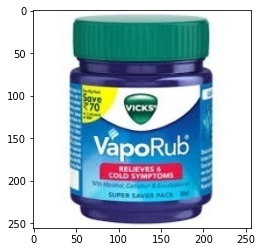

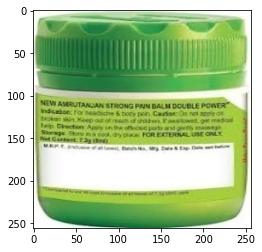

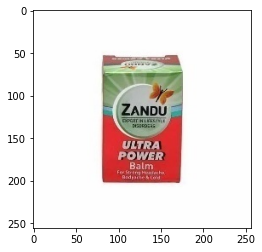

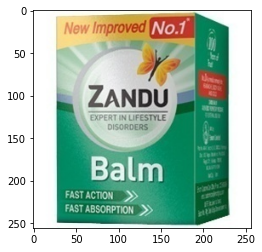

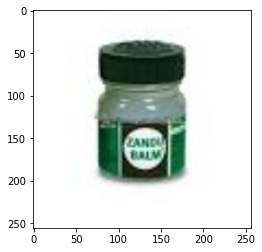

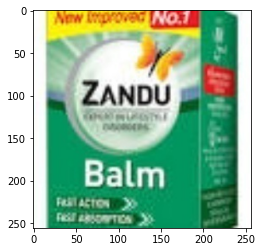

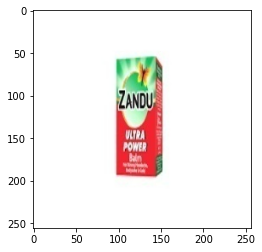

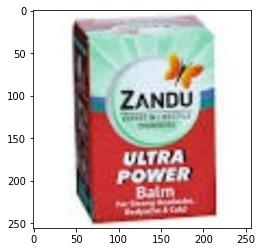

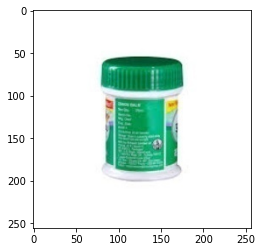

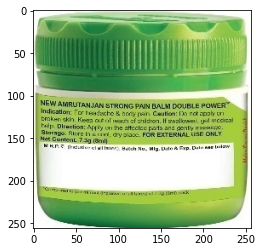

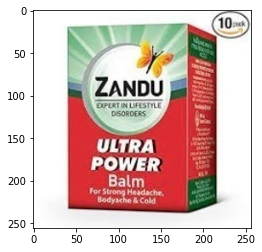

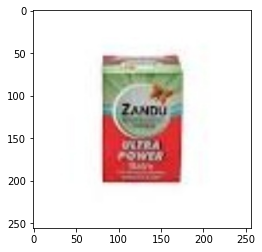

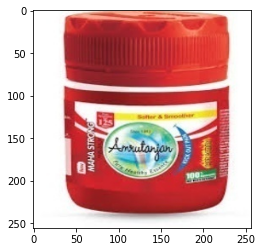

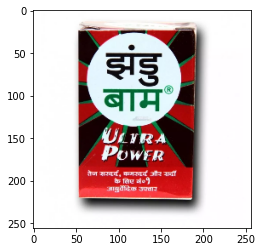

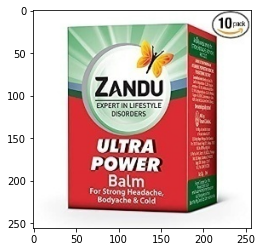

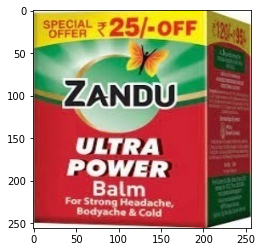

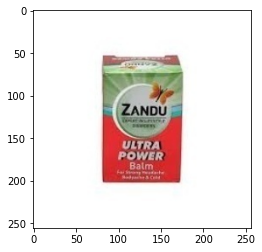

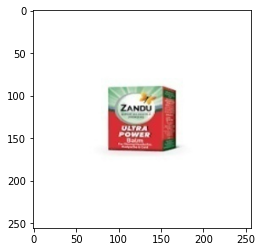

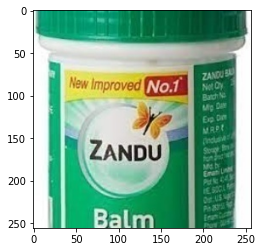

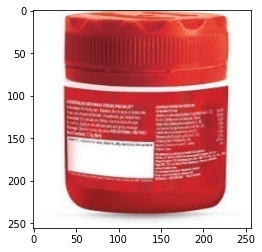

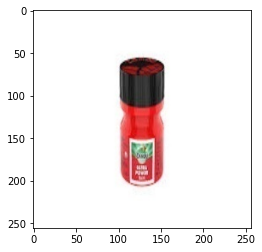

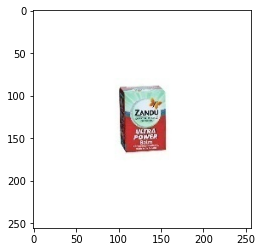

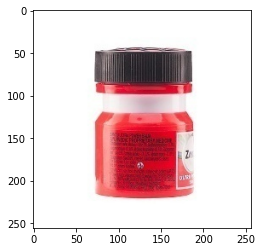

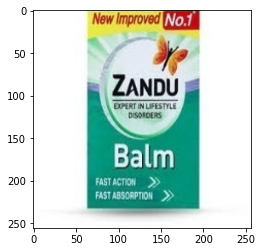

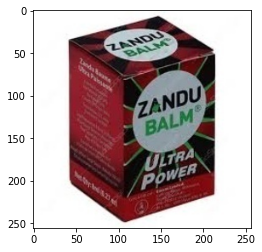

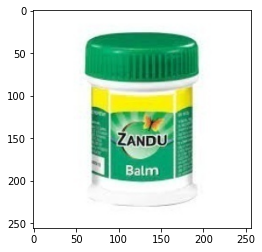

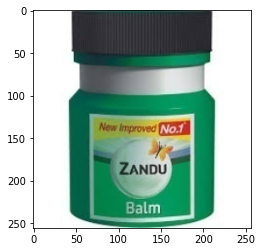

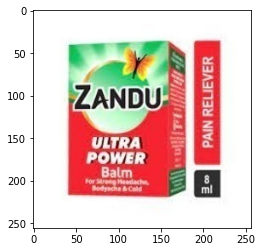

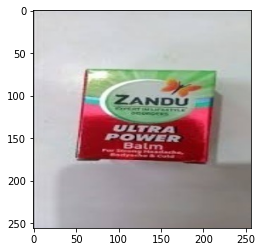

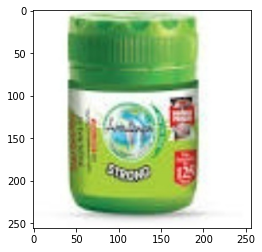

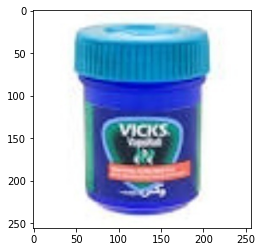

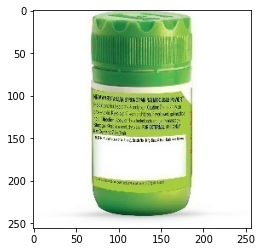

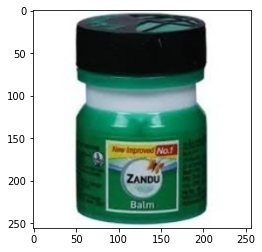

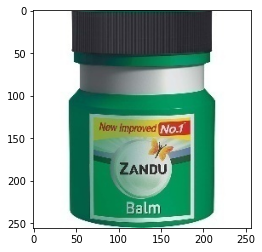

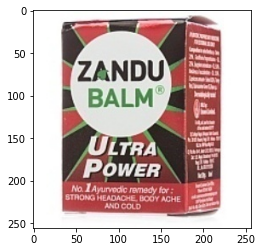

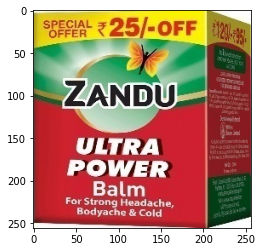

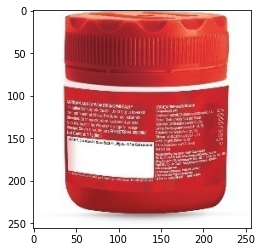

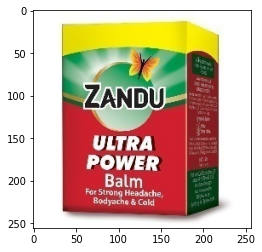

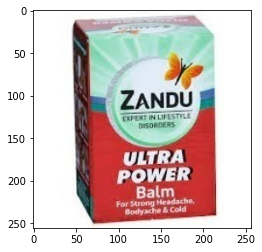

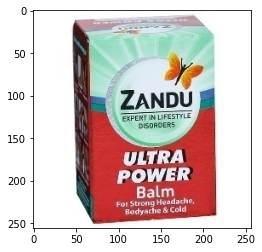

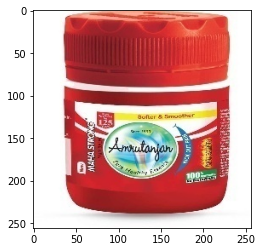

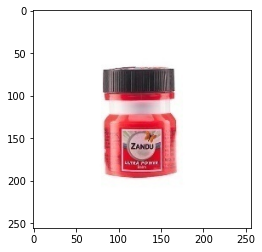

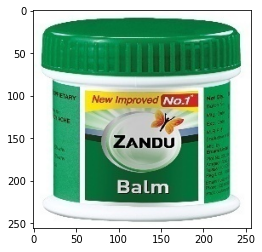

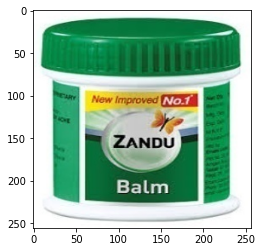

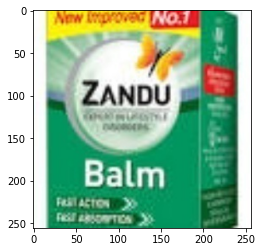

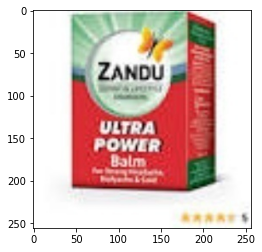

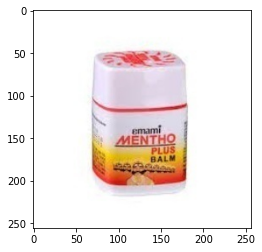

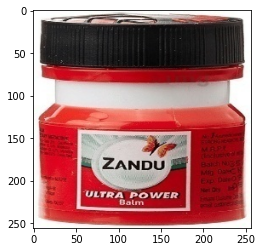

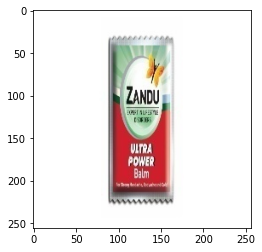

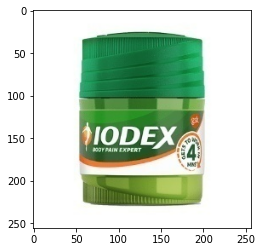

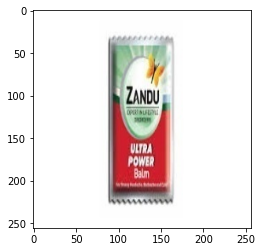

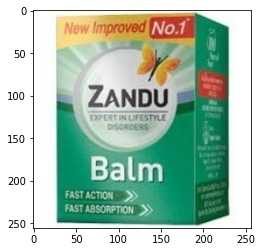

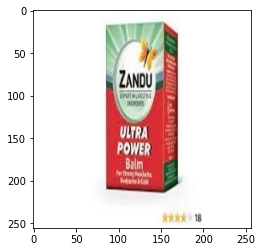

In [4]:
for i in os.listdir(train_path) :
    for j in os.listdir(train_path + "/" + i):
        img = cv.imread(train_path + "/" + i+ "/"+j)
        img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
    break

In [5]:
for i in os.listdir(train_path) :
    for j in os.listdir(train_path + "/" + i):
        img = cv.imread(train_path + "/" + i+ "/"+j)
#         img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
        img = img.reshape((256,256,3))
        cv.imwrite(train_path + "/" + i+ "/"+j, img)
        print(img.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 

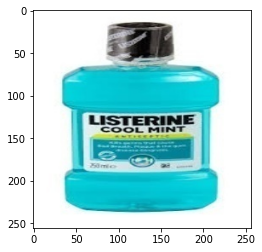

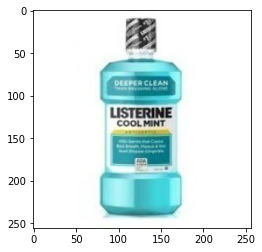

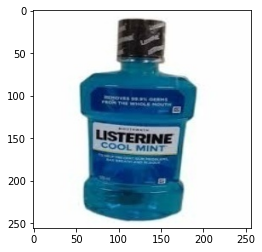

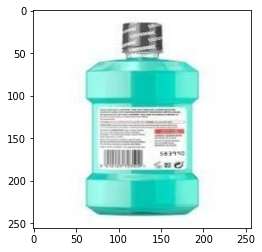

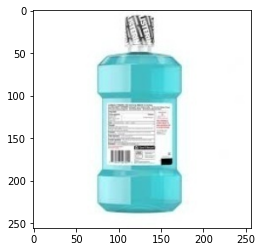

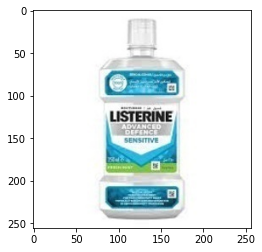

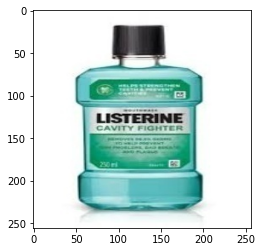

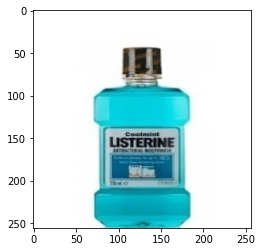

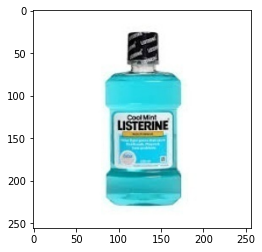

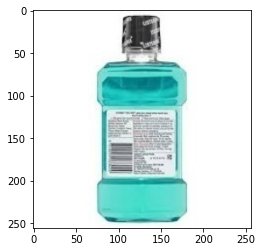

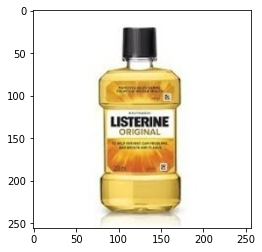

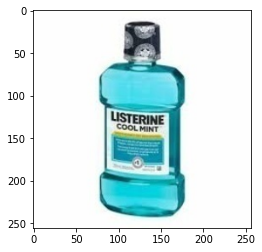

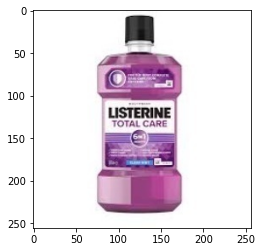

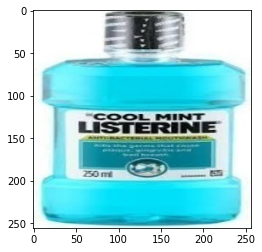

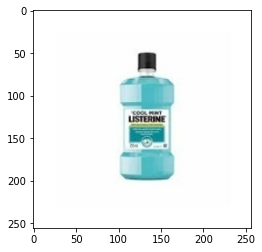

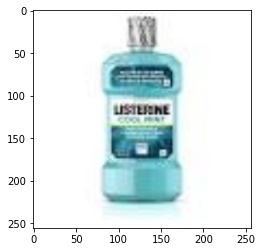

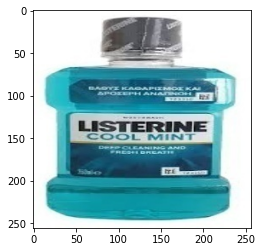

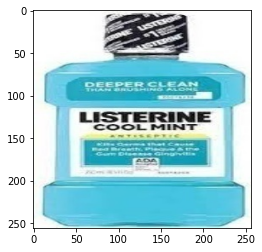

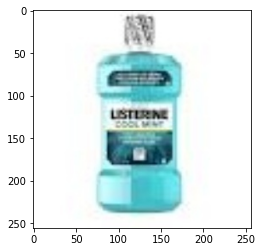

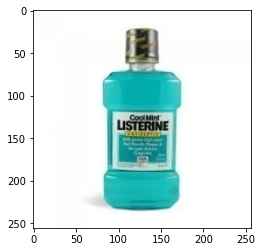

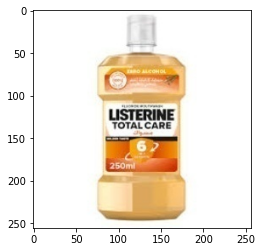

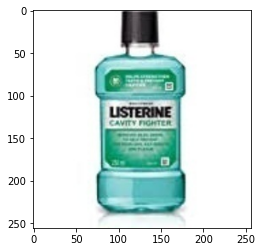

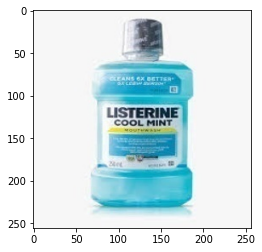

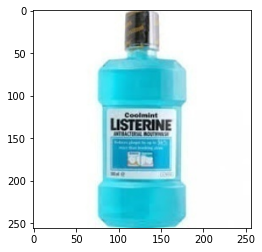

In [6]:
for i in os.listdir(test_path) :
    for j in os.listdir(test_path + "/" + i):
        img = cv.imread(test_path + "/" + i+ "/"+j)
        img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
        img = img.reshape((256,256,3))
        plt.imshow(img)
        plt.show()
    break

In [7]:
for i in os.listdir(test_path) :
    for j in os.listdir(test_path + "/" + i):
        img = cv.imread(test_path + "/" + i+ "/"+j)
#         img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
        img = img.reshape((256,256,3))
        cv.imwrite(test_path + "/" + i+ "/"+j, img)
        print(img.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 

In [8]:
c1 = 0
c2 = 0
for i in os.listdir(train_path):
    c1 = c1 + 1
    for j in os.listdir(train_path + "/" + i):
        c2 = c2+ 1
print("Training : ")
print("total classes : ",c1)
print("total images : ",c2)

Training : 
total classes :  12
total images :  923


In [9]:
c1 = 0
c2 = 0
for i in os.listdir(val_path):
    c1 = c1 + 1
    for j in os.listdir(test_path + "/" + i):
        c2 = c2+ 1
print("validation : ")
print("total classes : ",c1)
print("total images : ",c2)

validation : 
total classes :  12
total images :  260


In [10]:
model = Xception(include_top = False, weights = "imagenet", input_shape = (256, 256, 3))

83683744/83683744 [==============================] - 0s 0us/step


In [11]:
for layers in  model.layers :
    layers.trainable = False

In [12]:
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(c1, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [26]:
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [27]:
BATCH_SIZE = 16

train_generator = ImageDataGenerator(rotation_range=90, 
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5, 
                                     height_shift_range=0.5,
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                     validation_split=0.15,
                                     preprocessing_function=preprocess_input) 


test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) 

In [16]:
train_path

'/content/drive/MyDrive/se1/train'

In [28]:
class_subset = sorted(os.listdir('/content/drive/MyDrive/se1/train/'))[:12] 
print(class_subset)
traingen = train_generator.flow_from_directory(train_path,
                                               target_size=(256, 256),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='training',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=5)
validgen = train_generator.flow_from_directory(train_path,
                                               target_size=(256, 256),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=4)

testgen = test_generator.flow_from_directory(val_path,
                                             target_size=(256, 256),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=4)

['Amazfit bip u', 'Colgate Plax Fresh Mint Mouthwash 500 ml', 'Dettol Hand Sanitizer, 50ml', 'Engage M1 Perfume Spray For Men', 'Fastrack Analog Black Dial Unisex-Adult Watch-38024PP25', 'Fastrack FastFit Grey Dial Analog Unisex Watch', 'Fogg Xtremo', 'Listerine Cool Mint Mouthwash Liquid 250 ml', 'Zandu Balm 25 ml', 'Zandu Ultra Power Balm 8 ml', 'apple watch series 7', 'samsung watch 4']
Found 790 images belonging to 12 classes.
Found 132 images belonging to 12 classes.
Found 148 images belonging to 12 classes.


In [37]:
n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 5

tl_checkpoint_1 = ModelCheckpoint(filepath='model2.hdf5',
                                  save_best_only=True,
                                  monitor='val_acc',
                                  mode='max',
                                  verbose=1)

early_stop = EarlyStopping(monitor='loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')


vgg_history = model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1],verbose=1)

Epoch 1/5
49/49 [==============================] - ETA: 0s - loss: 5.0468 - acc: 0.4561

49/49 [==============================] - 198s 4s/step - loss: 5.0468 - acc: 0.4561
Epoch 2/5
49/49 [==============================] - ETA: 0s - loss: 2.2890 - acc: 0.5530

49/49 [==============================] - 192s 4s/step - loss: 2.2890 - acc: 0.5530
Epoch 3/5
49/49 [==============================] - ETA: 0s - loss: 1.4210 - acc: 0.6214

49/49 [==============================] - 187s 4s/step - loss: 1.4210 - acc: 0.6214
Epoch 4/5
49/49 [==============================] - ETA: 0s - loss: 1.2993 - acc: 0.6589

49/49 [==============================] - 185s 4s/step - loss: 1.2993 - acc: 0.6589
Epoch 5/5
49/49 [==============================] - ETA: 0s - loss: 0.9545 - acc: 0.7028

49/49 [==============================] - 187s 4s/step - loss: 0.9545 - acc: 0.7028


In [32]:
model.load_weights('model1.hdf5') 
true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

vgg_preds = model.predict(testgen)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

148/148 [==============================] - 47s 321ms/step


In [33]:
accuracy_score(true_classes, vgg_pred_classes)

0.5135135135135135

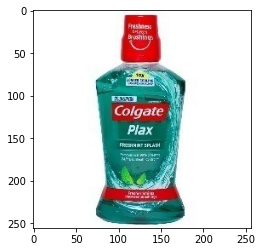

In [34]:
image = load_img('/content/drive/MyDrive/se1/test/Colgate Plax Fresh Mint Mouthwash 500 ml/1587469924_5812_1.jpg')
plt.imshow(image )
plt.show()

In [35]:
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
print(yhat)

1/1 [==============================] - 0s 302ms/step
[[6.2299294e-14 9.9999595e-01 1.2697042e-07 7.8695252e-11 7.3050271e-16
  2.8648564e-12 1.1683683e-09 1.1766658e-08 5.1966315e-10 3.9839706e-06
  2.7568948e-18 2.7467957e-11]]


In [36]:
label = np.argmax(yhat)
print(class_subset[label] )

Colgate Plax Fresh Mint Mouthwash 500 ml
